In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
df=pd.read_csv("https://raw.githubusercontent.com/panchaldhruv27223/datasets_for_ml_-csv-xlsl-/refs/heads/main/kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [96]:
df["floors"] = df["floors"].round().astype(int)
df["bathrooms"] = df["bathrooms"].round().astype(int)

In [97]:

np.random.seed(42)
cols = ["sqft_lot", "bathrooms"]

missing_pct = 0.05

for col in cols:
    n_missing = int(len(df) * missing_pct)
    missing_indices = np.random.choice(df.index, n_missing, replace=False)
    df.loc[missing_indices, col] = np.nan
    
print(df[cols].isna().sum())





sqft_lot     1080
bathrooms    1080
dtype: int64


{'whiskers': [<matplotlib.lines.Line2D at 0x272d41c9310>,
 'caps': [<matplotlib.lines.Line2D at 0x272d41c9590>,
 'boxes': [<matplotlib.lines.Line2D at 0x272d41c91d0>],
 'medians': [<matplotlib.lines.Line2D at 0x272d41c9810>],
 'fliers': [<matplotlib.lines.Line2D at 0x272d41c9950>],
 'means': []}

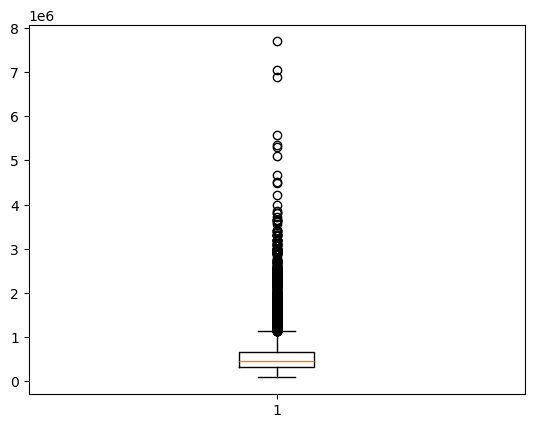

In [98]:
plt.boxplot(df["price"])

{'whiskers': [<matplotlib.lines.Line2D at 0x272d425da90>,
 'caps': [<matplotlib.lines.Line2D at 0x272d425dd10>,
 'boxes': [<matplotlib.lines.Line2D at 0x272d425d950>],
 'medians': [<matplotlib.lines.Line2D at 0x272d425df90>],
 'fliers': [<matplotlib.lines.Line2D at 0x272d425e0d0>],
 'means': []}

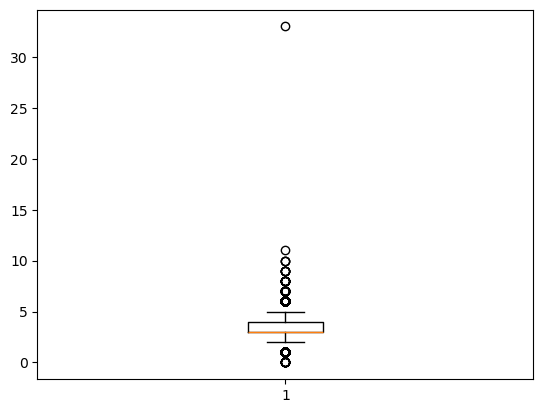

In [99]:
plt.boxplot(df["bedrooms"])

{'whiskers': [<matplotlib.lines.Line2D at 0x272d42c5310>,
 'caps': [<matplotlib.lines.Line2D at 0x272d42c5590>,
 'boxes': [<matplotlib.lines.Line2D at 0x272d42c51d0>],
 'medians': [<matplotlib.lines.Line2D at 0x272d42c5810>],
 'fliers': [<matplotlib.lines.Line2D at 0x272d42c5950>],
 'means': []}

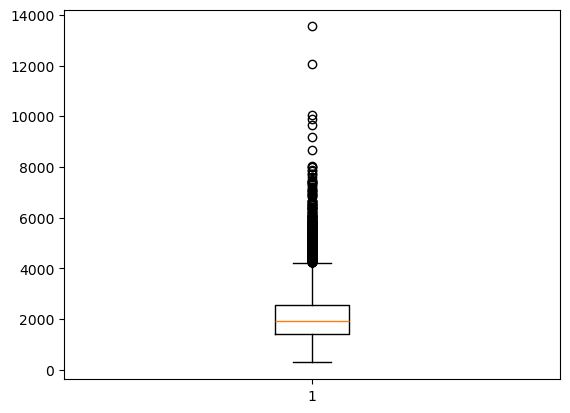

In [100]:
plt.boxplot(df["sqft_living"])

In [101]:
df["bedrooms"].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  0,  8,  9, 11, 10, 33])

In [103]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot         float64
floors             int64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [104]:
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] >= lower) & (df[col] <= upper)]



In [105]:
df_new=remove_outliers(df,"bedrooms")
df_new = remove_outliers(df_new,"price")
df_new = remove_outliers(df_new,"sqft_living")

print("before removing the outliers ",df.shape)
print("after removing the outliers ",df_new.shape)



before removing the outliers  (21613, 21)
after removing the outliers  (19665, 21)


In [106]:
df_new.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.0,1180,5650.0,1,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.0,2570,7242.0,2,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.0,770,10000.0,1,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.0,1960,5000.0,1,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.0,1680,8080.0,1,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


{'whiskers': [<matplotlib.lines.Line2D at 0x272d3fbd590>,
 'caps': [<matplotlib.lines.Line2D at 0x272d4324cd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x272cad04690>],
 'medians': [<matplotlib.lines.Line2D at 0x272d4324f50>],
 'fliers': [<matplotlib.lines.Line2D at 0x272d4325090>],
 'means': []}

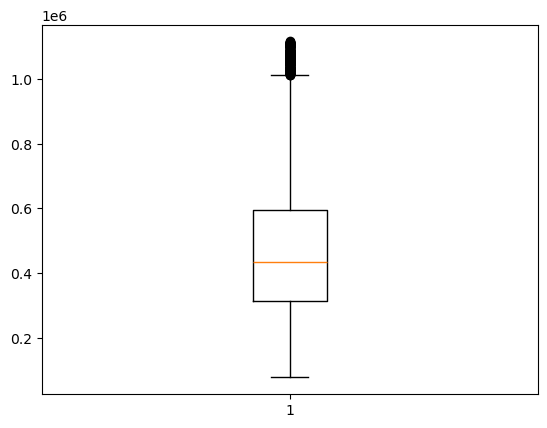

In [107]:
plt.boxplot(df_new["price"])

In [108]:
df_new.columns


Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [109]:
df_new.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot         float64
floors             int64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [110]:
df_new["date"]=pd.to_datetime(df_new["date"])

In [111]:
df_new.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                float64
floors                    int64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

In [112]:
df_new["sale_year"] = df_new["date"].dt.year
df_new["sale_month"] = df_new["date"].dt.month



In [113]:
df_new["house_age"]=df_new["sale_year"]-df_new["yr_built"]

In [114]:
df_new.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sale_year,sale_month,house_age
0,7129300520,2014-10-13,221900.0,3,1.0,1180,5650.0,1,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,59
1,6414100192,2014-12-09,538000.0,3,2.0,2570,7242.0,2,0,0,...,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,63
2,5631500400,2015-02-25,180000.0,2,1.0,770,10000.0,1,0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,82
3,2487200875,2014-12-09,604000.0,4,3.0,1960,5000.0,1,0,0,...,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,49
4,1954400510,2015-02-18,510000.0,3,2.0,1680,8080.0,1,0,0,...,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,28


In [115]:
df_new["was_renovated"] = (df_new["yr_renovated"] != 0).astype(int)

In [116]:
df_new["yr_renovated"]

0           0
1        1991
2           0
3           0
4           0
         ... 
21608       0
21609       0
21610       0
21611       0
21612       0
Name: yr_renovated, Length: 19665, dtype: int64

In [117]:
df_new["age_since_renovation"] = np.where(
    df_new["yr_renovated"] != 0,
    df_new["sale_year"] - df_new["yr_renovated"],
    df_new["house_age"]
)

In [118]:
df_new.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,sale_year,sale_month,house_age,was_renovated,age_since_renovation
0,7129300520,2014-10-13,221900.0,3,1.0,1180,5650.0,1,0,0,...,98178,47.5112,-122.257,1340,5650,2014,10,59,0,59
1,6414100192,2014-12-09,538000.0,3,2.0,2570,7242.0,2,0,0,...,98125,47.7210,-122.319,1690,7639,2014,12,63,1,23
2,5631500400,2015-02-25,180000.0,2,1.0,770,10000.0,1,0,0,...,98028,47.7379,-122.233,2720,8062,2015,2,82,0,82
3,2487200875,2014-12-09,604000.0,4,3.0,1960,5000.0,1,0,0,...,98136,47.5208,-122.393,1360,5000,2014,12,49,0,49
4,1954400510,2015-02-18,510000.0,3,2.0,1680,8080.0,1,0,0,...,98074,47.6168,-122.045,1800,7503,2015,2,28,0,28


In [119]:
df_new["sqft_living_per_floor"] = np.where(
    df_new["floors"] != 0,
    df_new["sqft_living"] / df_new["floors"],
    np.nan
)

df_new["bath_per_bed"] = np.where(
    df_new["bedrooms"] != 0,
    df_new["bathrooms"] / df_new["bedrooms"],
    np.nan
)




In [120]:
df_new.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,long,sqft_living15,sqft_lot15,sale_year,sale_month,house_age,was_renovated,age_since_renovation,sqft_living_per_floor,bath_per_bed
0,7129300520,2014-10-13,221900.0,3,1.0,1180,5650.0,1,0,0,...,-122.257,1340,5650,2014,10,59,0,59,1180.0,0.333333
1,6414100192,2014-12-09,538000.0,3,2.0,2570,7242.0,2,0,0,...,-122.319,1690,7639,2014,12,63,1,23,1285.0,0.666667
2,5631500400,2015-02-25,180000.0,2,1.0,770,10000.0,1,0,0,...,-122.233,2720,8062,2015,2,82,0,82,770.0,0.500000
3,2487200875,2014-12-09,604000.0,4,3.0,1960,5000.0,1,0,0,...,-122.393,1360,5000,2014,12,49,0,49,1960.0,0.750000
4,1954400510,2015-02-18,510000.0,3,2.0,1680,8080.0,1,0,0,...,-122.045,1800,7503,2015,2,28,0,28,1680.0,0.666667


In [121]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19665 entries, 0 to 21612
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     19665 non-null  int64         
 1   date                   19665 non-null  datetime64[ns]
 2   price                  19665 non-null  float64       
 3   bedrooms               19665 non-null  int64         
 4   bathrooms              18692 non-null  float64       
 5   sqft_living            19665 non-null  int64         
 6   sqft_lot               18692 non-null  float64       
 7   floors                 19665 non-null  int64         
 8   waterfront             19665 non-null  int64         
 9   view                   19665 non-null  int64         
 10  condition              19665 non-null  int64         
 11  grade                  19665 non-null  int64         
 12  sqft_above             19665 non-null  int64         
 13  sqft_b

## Task 2: Build a Sophisticated Preprocessing Pipeline

In [122]:
from sklearn.model_selection import train_test_split
X = df_new.drop(columns=["price"])
y = df_new["price"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [124]:
num_features = [
    "bathrooms", "sqft_living", "sqft_lot", "floors",
    "sqft_above", "sqft_basement", "lat", "long",
    "sqft_living15", "sqft_lot15", "house_age",
    "age_since_renovation", "sqft_living_per_floor", "bath_per_bed"
]

cat_features = ["zipcode", "waterfront", "view"]

passthrough_features = ["grade", "condition", "was_renovated", "sale_year", "sale_month"]

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

n_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

c_pipeline = Pipeline(steps=[
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])


from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ("num_pipe", n_pipeline, num_features),
        ("cat_pipe", c_pipeline, cat_features),
        ("pass_pipe", 'passthrough', passthrough_features)
    ],
    remainder="drop"
)

## Task 3: Model Training and Hyperparameter Tuning


In [ ]:
!pip install xgboost

In [128]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

models = {
    "RandomForest": RandomForestRegressor(random_state=42),
    "GradientBoosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, objective="reg:squarederror")
}

pipelines = {
    name: Pipeline(steps=[("preprocessor", preprocessor),
                          ("regressor", model)])
    for name, model in models.items()
}

param_grids = {
    "RandomForest": {
        "regressor__n_estimators": [100, 200],
        "regressor__max_depth": [10, 20],
    },
    "GradientBoosting": {
        "regressor__n_estimators": [100, 200],
        "regressor__max_depth": [3, 5],
    },
    "XGBoost": {
        "regressor__n_estimators": [100, 200],
        "regressor__max_depth": [5, 7],
    }
}

best_models = {}
for name, pipeline in pipelines.items():
    print(f"Training {name}...")
    grid_search = GridSearchCV(
        pipeline,
        param_grids[name],
        cv=3,                
        scoring="r2",         
        n_jobs=-1,
        verbose=1
    )
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_
    print(f"{name} best params: {grid_search.best_params_}")
    print(f"{name} best CV score: {grid_search.best_score_}")

Training RandomForest...
Fitting 3 folds for each of 4 candidates, totalling 12 fits
RandomForest best params: {'regressor__max_depth': 20, 'regressor__n_estimators': 200}
RandomForest best CV score: 0.8551391814805971
Training GradientBoosting...
Fitting 3 folds for each of 4 candidates, totalling 12 fits
GradientBoosting best params: {'regressor__max_depth': 5, 'regressor__n_estimators': 200}
GradientBoosting best CV score: 0.8725719505399837
Training XGBoost...
Fitting 3 folds for each of 4 candidates, totalling 12 fits
XGBoost best params: {'regressor__max_depth': 5, 'regressor__n_estimators': 200}
XGBoost best CV score: 0.8681137039165941


## Task 4: Evaluation and Interpretation

In [130]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

best_model_name = max(best_models, key=lambda name: best_models[name].score(X_test, y_test))
best_pipeline = best_models[best_model_name]

y_pred = best_pipeline.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Best Model: {best_model_name}")
print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

Best Model: GradientBoosting
R² Score: 0.8750
MAE: 49924.65
RMSE: 71113.81


Percentage Improvement in R²: 25.00%


,Model,R2 Score
0,Baseline,0.700000
1,GradientBoosting,0.875035


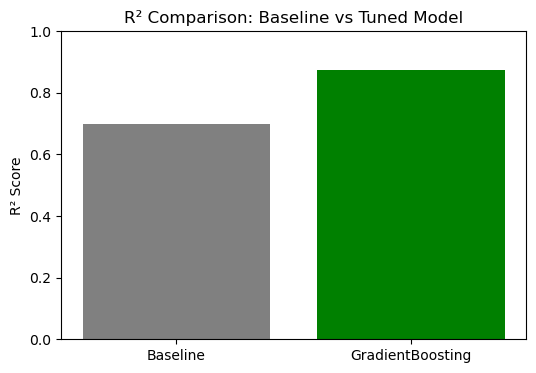

In [131]:

import matplotlib.pyplot as plt
baseline_r2 = 0.70
tuned_r2 = r2  
improvement_r2 = (tuned_r2 - baseline_r2) / abs(baseline_r2) * 100

results_r2 = pd.DataFrame({
    "Model": ["Baseline", best_model_name],
    "R2 Score": [baseline_r2, tuned_r2]
})

print(f"Percentage Improvement in R²: {improvement_r2:.2f}%")
display(results_r2)

plt.figure(figsize=(6,4))
plt.bar(results_r2["Model"], results_r2["R2 Score"], color=["gray", "green"])
plt.ylabel("R² Score")
plt.title("R² Comparison: Baseline vs Tuned Model")
plt.ylim(0, 1)
plt.show()

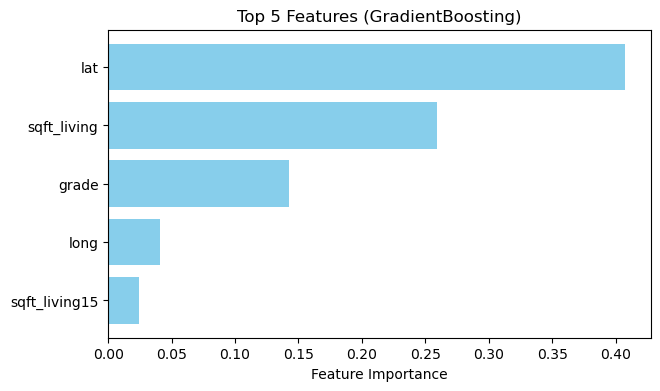

Top 5 Important Features:


,Feature,Importance
6,lat,0.407361
1,sqft_living,0.259190
91,grade,0.142239
7,long,0.040649
8,sqft_living15,0.023898


In [145]:

fitted_preprocessor = best_pipeline.named_steps["preprocessor"]
num_names = num_features  
cat_encoder = fitted_preprocessor.named_transformers_["cat_pipe"].named_steps["encoder"]
cat_names = cat_encoder.get_feature_names_out(cat_features)
pass_names = passthrough_features
all_feature_names = np.concatenate([num_names, cat_names, pass_names])
importances = best_pipeline.named_steps["regressor"].feature_importances_
top5 = feat_importances.head(5)
plt.figure(figsize=(7,4))
plt.barh(top5["Feature"][::-1], top5["Importance"][::-1], color="skyblue")
plt.xlabel("Feature Importance")
plt.title(f"Top 5 Features ({best_model_name})")
plt.show()
print("Top 5 Important Features:")
display(top5)

## Summary

-> The model shows that location (lat/long) is the biggest driver of house prices, which makes sense since neighborhoods, schools, and amenities strongly affect value. 

-> House size (sqft_living) and quality (grade) also matter a lot, reflecting how bigger and better-built homes are worth more. 

-> Also sqft_living15 the average size of nearby homes—also ranks in the top 5, showing that a home’s value is influenced not just by itself but also by its neighborhood context.
